<h2>OBSERVATIONAL ASTROPHYSICS – FALL 2019 Reduction Exercise: Part 3</h2>

In this part you will take all of your images in a given band and align them using a program called "astroalign"

We will be aligning images with the http://toros-astro.github.io/astroalign/ package

First, from within your python3 enviroment you will need to run "*conda install astroalign*" to install the package

In [2]:
import astroalign as aa
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
from astropy.io import fits

A function that takes an source image name, a target image name to which the source will be transformed, and an output file name.  The output file will be the source image transformed to match the target image.

In [4]:

def im_trans(filesource,filetarg,fileout):
    #filesource is the file that you want to be transformed
    #filetarg is the file that you want to transform the first file to
    #fileout is the output file that has been transformed

    redpath = "/home/s376r951/RFSLAB/USER_DPT/s376r951/Data/Reduced_Complete/"
    imgfilesource = redpath + filesource
    imgfiletarg = redpath + filetarg
    print(imgfilesource)

    #read in the source file and target file, splitting the file into a data and header component
    imgsource, hdrsource = fits.getdata(imgfilesource, header=True)
    imgtarg, hdrtarg = fits.getdata(imgfiletarg, header=True)

    #run the alignment tool.
    imgsource_aligned, footprint = aa.register(imgsource, imgtarg)

    #write out the transformed file
    imtransname = redpath + fileout
    fits.writeto(imtransname, imgsource_aligned, header=hdrsource, overwrite=True)

    #find the transformation
    p, (pos_imgsource, pos_imgsource_aligned) = aa.find_transform(imgsource, imgtarg)
                            
    #print out the transformation
    #******check that the output makes sense for each target
    print("Rotation: {:.2f} degrees".format(p.rotation * 180.0 / np.pi))
    print("\nScale factor: {:.2f}".format(p.scale))
    print("\nTranslation: (x, y) = ({:.2f}, {:.2f})".format(*p.translation))
    
    #plot the stars found in common in each plot
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))

    colors = ['r', 'g', 'b', 'y', 'cyan', 'w', 'm']

    axes[0, 0].imshow(imgsource, cmap='gray', interpolation='none', origin='lower',vmin = 250, vmax = 1000)
    axes[0, 0].axis('off')
    axes[0, 0].set_title("Source Image")
    for (xp, yp), c in zip(pos_imgsource[:len(colors)], colors):
        circ = plt.Circle((xp, yp), 4, fill=False, edgecolor=c, linewidth=5)
        axes[0, 0].add_patch(circ)

    axes[0, 1].imshow(imgtarg, cmap='gray', interpolation='none', origin='lower',vmin = 250, vmax = 1000)
    axes[0, 1].axis('off')
    axes[0, 1].set_title("Target Image")
    for (xp, yp), c in zip(pos_imgsource_aligned[:len(colors)], colors):
        circ = plt.Circle((xp, yp), 4 * p.scale, fill=False, edgecolor=c, linewidth=5)
        axes[0, 1].add_patch(circ)

    axes[1, 1].imshow(imgsource_aligned, cmap='gray', interpolation='none', origin='lower',vmin = 250, vmax = 1000)
    axes[1, 1].axis('off')
    axes[1, 1].set_title("Source Image aligned with Target")
    for (xp, yp), c in zip(pos_imgsource_aligned[:len(colors)], colors):
        circ = plt.Circle((xp, yp), 4 * p.scale, fill=False, edgecolor=c, linewidth=5)
        axes[1, 1].add_patch(circ)

    axes[1, 0].axis('off')

    plt.tight_layout()
    plt.show()

Make a series of calls to this function that transform each of your images to the first image in that band for each target.  I give an example below.

/home/s376r951/RFSLAB/USER_DPT/s376r951/Data/Reduced_Complete/s052_trbf.fits
Rotation: -0.00 degrees

Scale factor: 1.00

Translation: (x, y) = (14.79, 1.59)


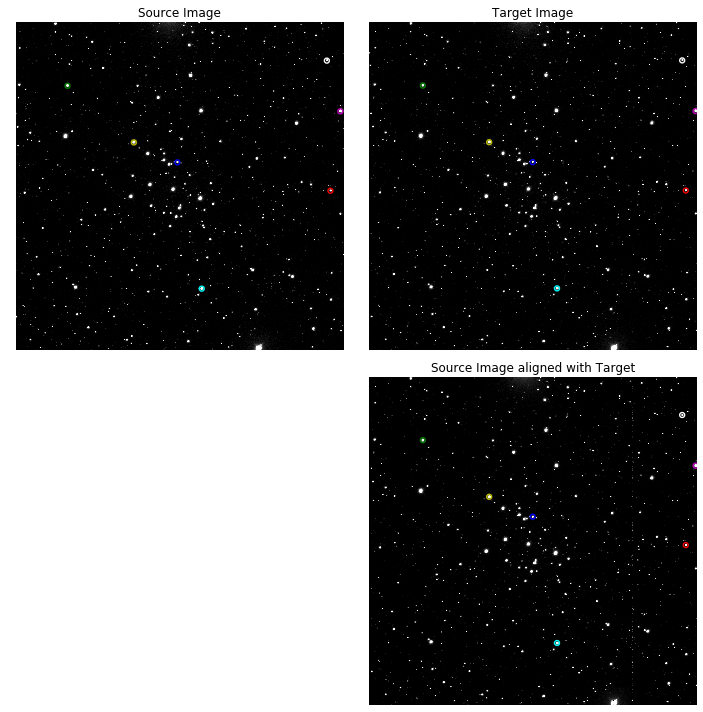

/home/s376r951/RFSLAB/USER_DPT/s376r951/Data/Reduced_Complete/s053_trbf.fits
Rotation: -0.00 degrees

Scale factor: 1.00

Translation: (x, y) = (23.14, 2.97)


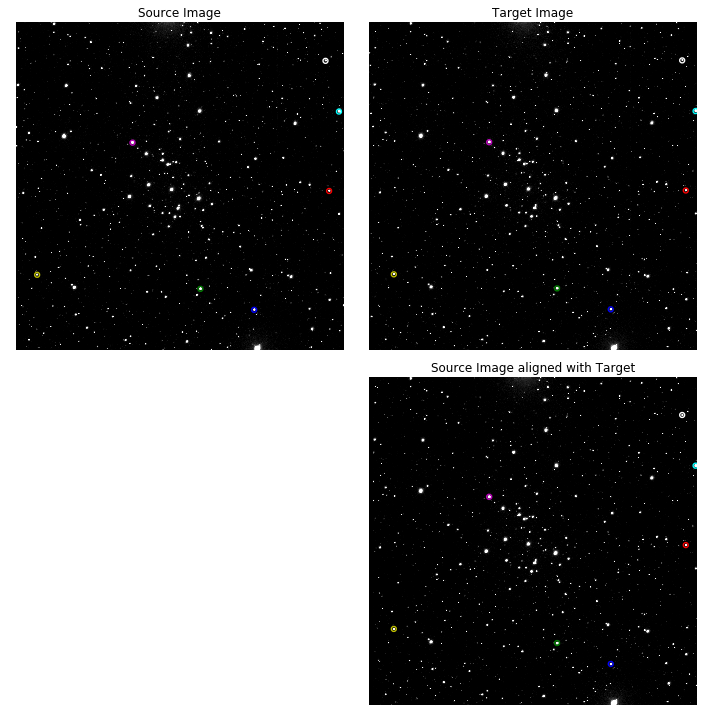

/home/s376r951/RFSLAB/USER_DPT/s376r951/Data/Reduced_Complete/s054_trbf.fits
Rotation: -0.01 degrees

Scale factor: 1.00

Translation: (x, y) = (54.01, 4.47)


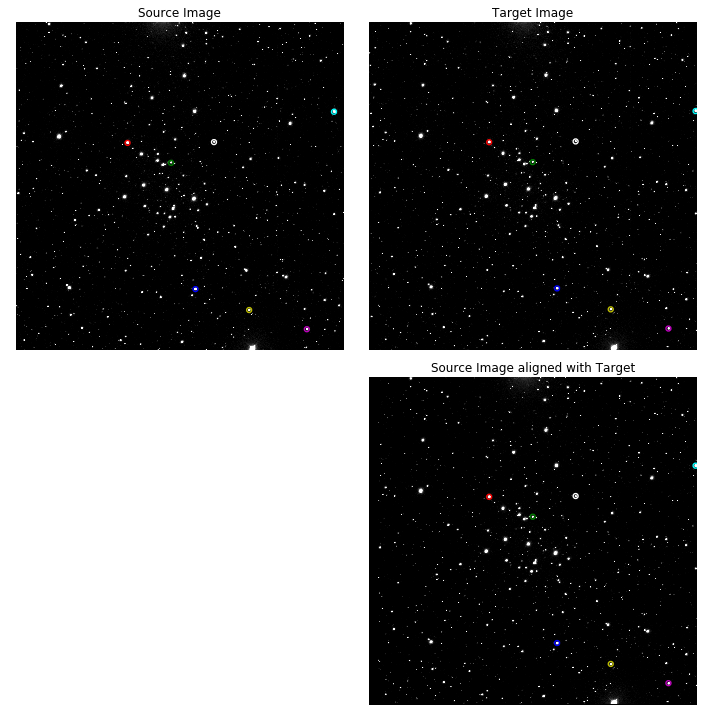

/home/s376r951/RFSLAB/USER_DPT/s376r951/Data/Reduced_Complete/s055_trbf.fits
Rotation: -0.01 degrees

Scale factor: 1.00

Translation: (x, y) = (87.27, 5.92)


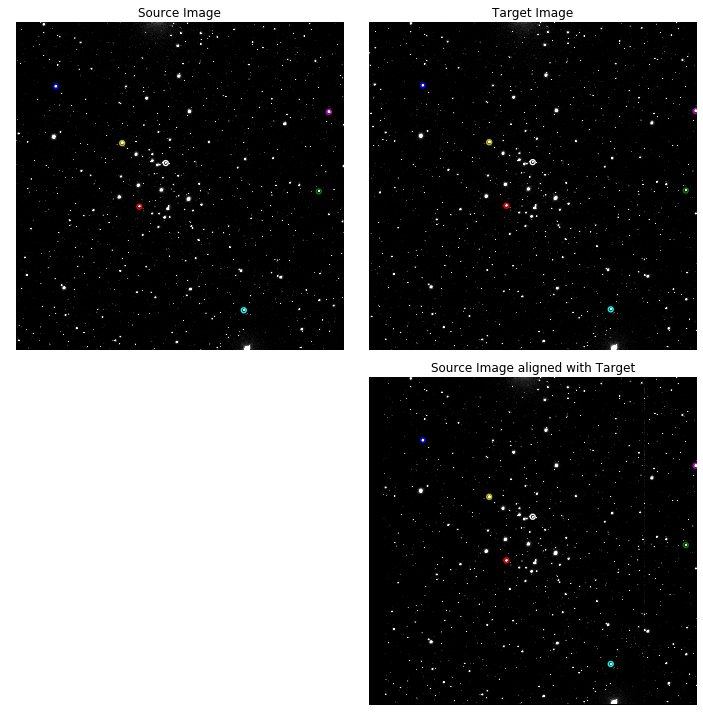

/home/s376r951/RFSLAB/USER_DPT/s376r951/Data/Reduced_Complete/s056_trbf.fits
Rotation: -0.02 degrees

Scale factor: 1.00

Translation: (x, y) = (115.11, 7.66)


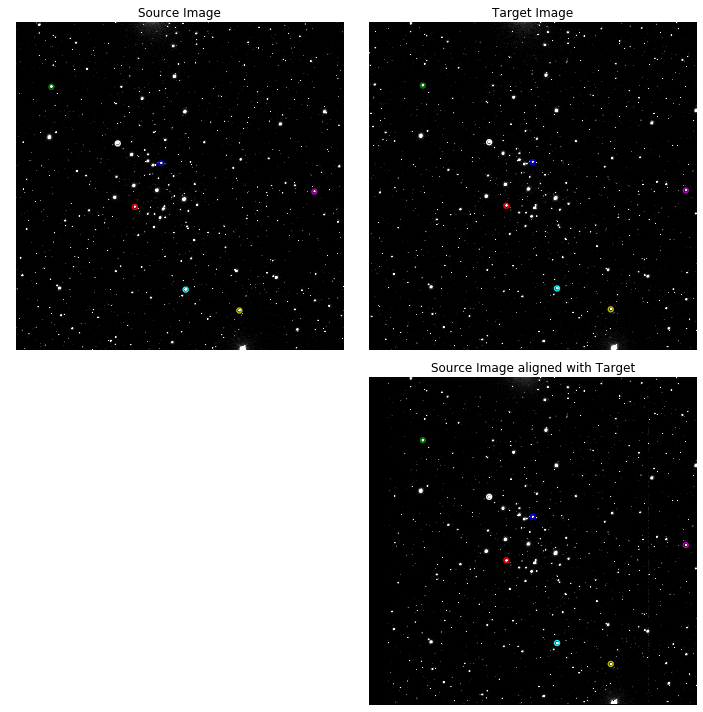

/home/s376r951/RFSLAB/USER_DPT/s376r951/Data/Reduced_Complete/s057_trbf.fits
Rotation: -0.02 degrees

Scale factor: 1.00

Translation: (x, y) = (145.17, 8.76)


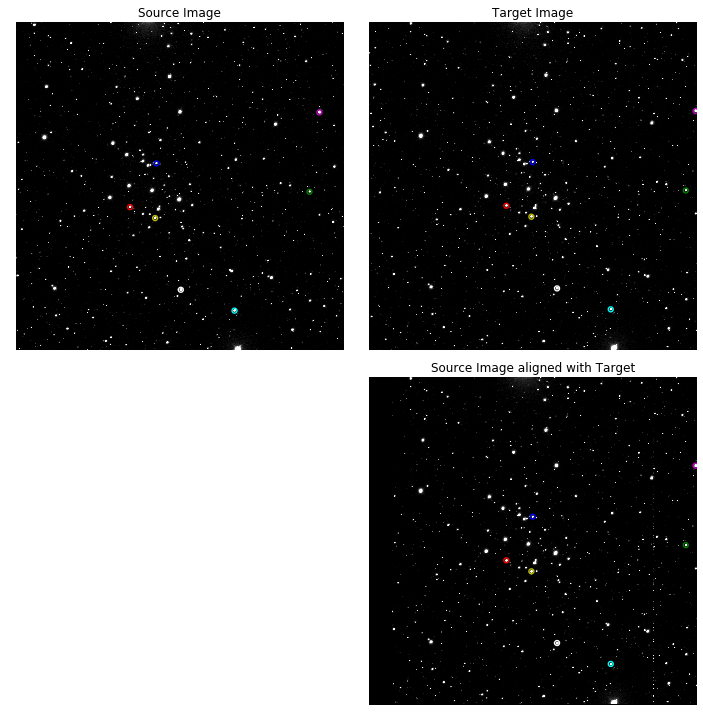

/home/s376r951/RFSLAB/USER_DPT/s376r951/Data/Reduced_Complete/s058_trbf.fits
Rotation: -0.03 degrees

Scale factor: 1.00

Translation: (x, y) = (176.33, 8.76)


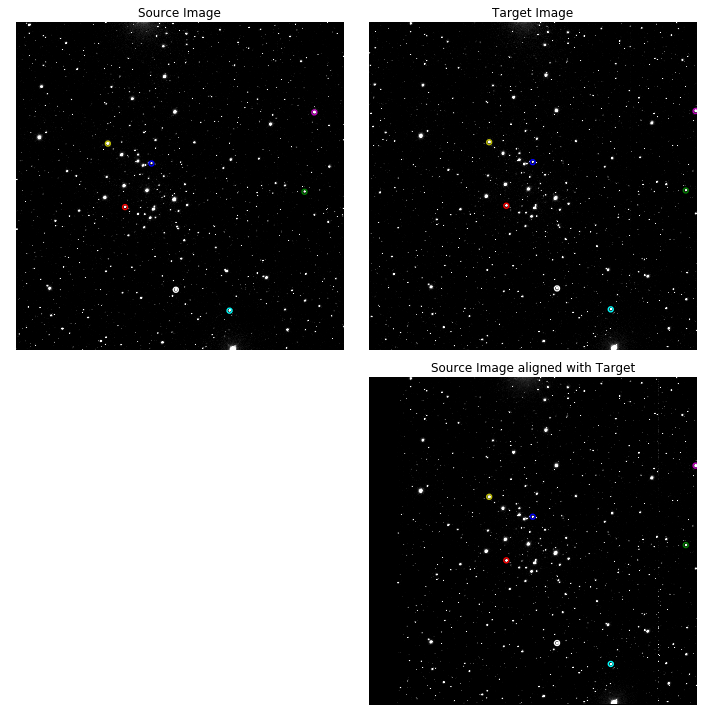

/home/s376r951/RFSLAB/USER_DPT/s376r951/Data/Reduced_Complete/s059_trbf.fits
Rotation: -0.03 degrees

Scale factor: 1.00

Translation: (x, y) = (204.53, 8.60)


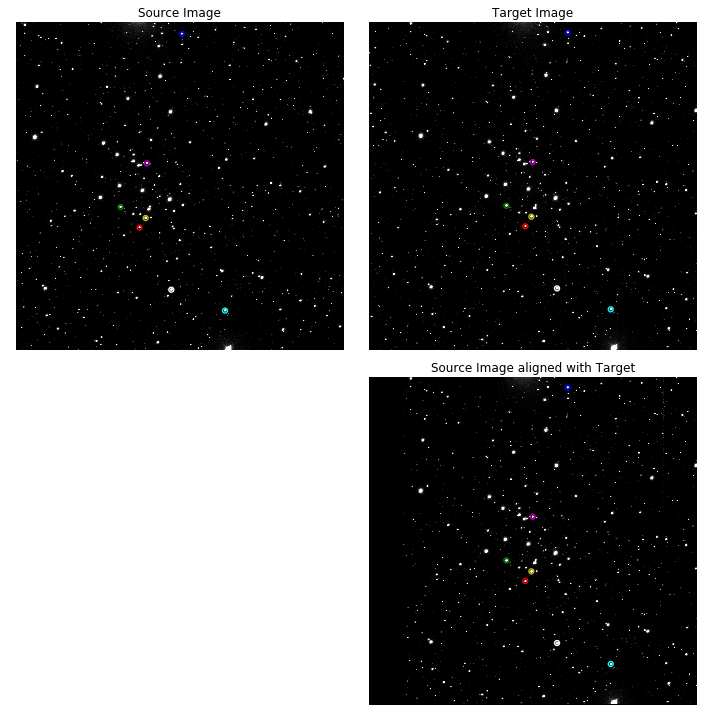

/home/s376r951/RFSLAB/USER_DPT/s376r951/Data/Reduced_Complete/s071_trbf.fits
Rotation: -0.01 degrees

Scale factor: 1.00

Translation: (x, y) = (46.72, 3.49)


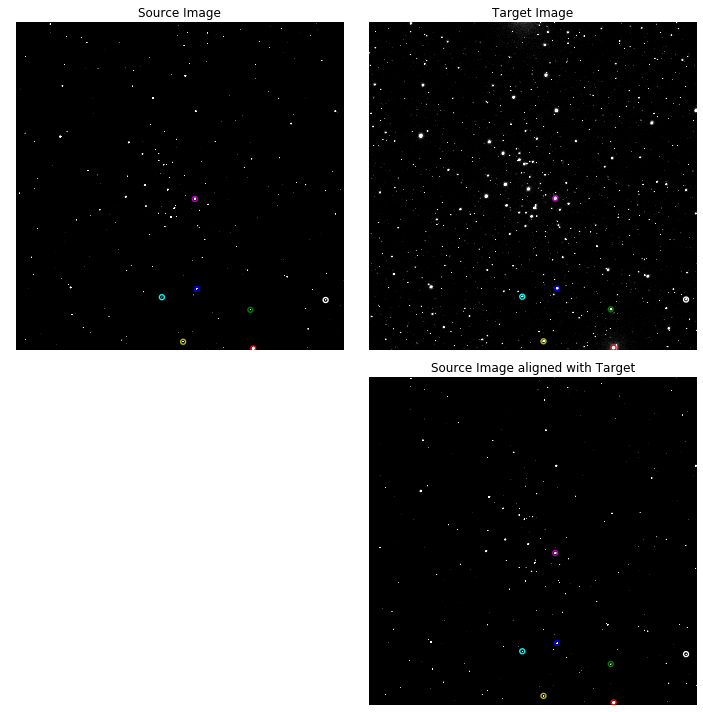

/home/s376r951/RFSLAB/USER_DPT/s376r951/Data/Reduced_Complete/s072_trbf.fits
Rotation: -0.02 degrees

Scale factor: 1.00

Translation: (x, y) = (75.01, 3.14)


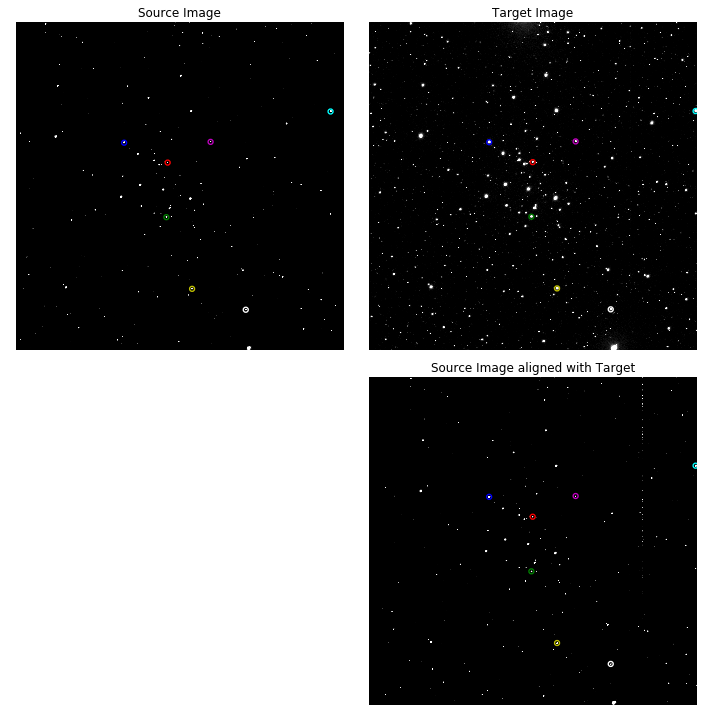

/home/s376r951/RFSLAB/USER_DPT/s376r951/Data/Reduced_Complete/s073_trbf.fits
Rotation: -0.02 degrees

Scale factor: 1.00

Translation: (x, y) = (108.36, 2.62)


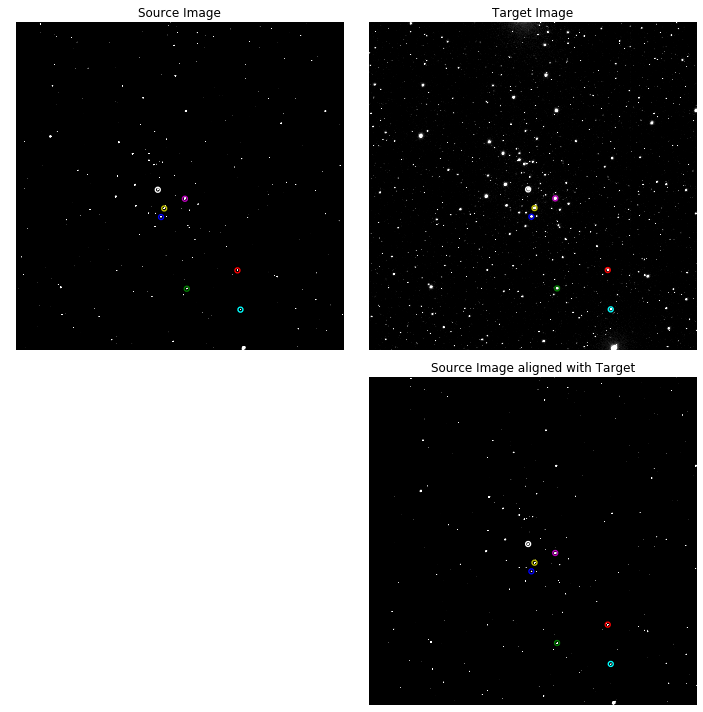

/home/s376r951/RFSLAB/USER_DPT/s376r951/Data/Reduced_Complete/s061_trbf.fits
Rotation: 0.00 degrees

Scale factor: 1.00

Translation: (x, y) = (-32.55, -0.49)


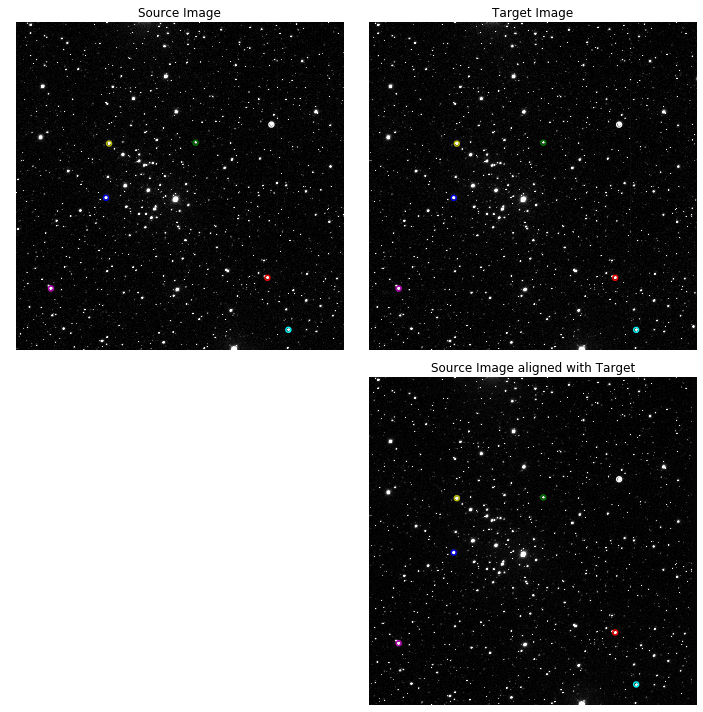

/home/s376r951/RFSLAB/USER_DPT/s376r951/Data/Reduced_Complete/s062_trbf.fits
Rotation: 0.00 degrees

Scale factor: 1.00

Translation: (x, y) = (-34.05, -0.23)


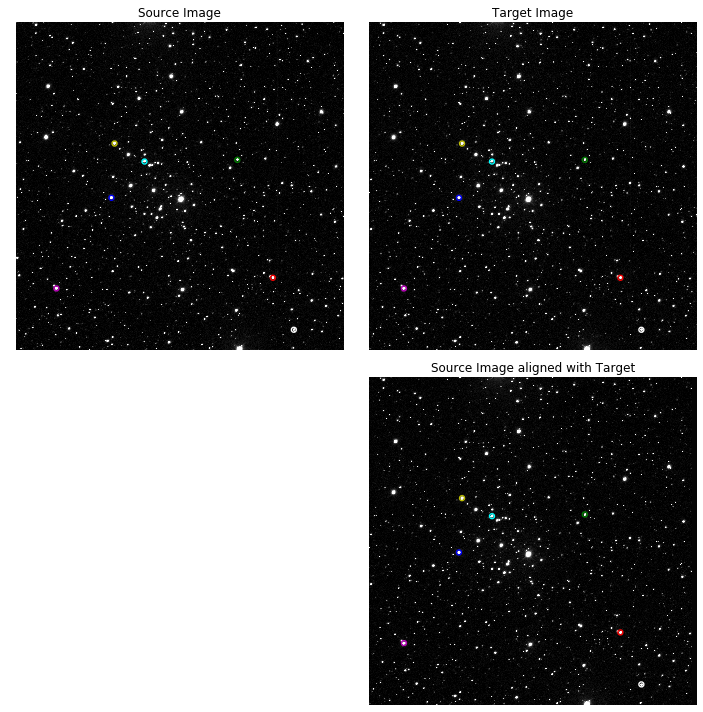

/home/s376r951/RFSLAB/USER_DPT/s376r951/Data/Reduced_Complete/s063_trbf.fits


FileNotFoundError: [Errno 2] No such file or directory: '/home/s376r951/RFSLAB/USER_DPT/s376r951/Data/Reduced_Complete/s063_trbfa.fits'

In [8]:
#***********
#NGC 7296 B-band
im_trans("s052_trbf.fits","s051_trbf.fits","s052_trbfa.fits")
im_trans("s053_trbf.fits","s051_trbf.fits","s053_trbfa.fits")
im_trans("s054_trbf.fits","s051_trbf.fits","s054_trbfa.fits")
im_trans("s055_trbf.fits","s051_trbf.fits","s055_trbfa.fits")
im_trans("s056_trbf.fits","s051_trbf.fits","s056_trbfa.fits")
im_trans("s057_trbf.fits","s051_trbf.fits","s057_trbfa.fits")
im_trans("s058_trbf.fits","s051_trbf.fits","s058_trbfa.fits")
im_trans("s059_trbf.fits","s051_trbf.fits","s059_trbfa.fits")
im_trans("s071_trbf.fits","s051_trbf.fits","s071_trbfa.fits")
im_trans("s072_trbf.fits","s051_trbf.fits","s072_trbfa.fits")
im_trans("s073_trbf.fits","s051_trbf.fits","s073_trbfa.fits")


# NGC 7296 V-Band
im_trans("s061_trbf.fits","s060_trbf.fits","s061_trbfa.fits")
im_trans("s062_trbf.fits","s061_trbf.fits","s062_trbfa.fits")
im_trans("s063_trbf.fits","s061_trbf.fits","s063_trbfa.fits")
im_trans("s064_trbf.fits","s061_trbf.fits","s064_trbfa.fits")
im_trans("s065_trbf.fits","s061_trbf.fits","s065_trbfa.fits")
im_trans("s066_trbf.fits","s061_trbf.fits","s066_trbfa.fits")
im_trans("s067_trbf.fits","s061_trbf.fits","s067_trbfa.fits")
im_trans("s068_trbf.fits","s061_trbf.fits","s068_trbfa.fits")
im_trans("s069_trbf.fits","s061_trbf.fits","s069_trbfa.fits")
im_trans("s070_trbf.fits","s061_trbf.fits","s070_trbfa.fits")



#KING 20 B-Band
im_trans("s081_trbf.fits","s080_trbf.fits","s081_trbfa.fits")
im_trans("s082_trbf.fits","s080_trbf.fits","s082_trbfa.fits")
im_trans("s083_trbf.fits","s080_trbf.fits","s083_trbfa.fits")
im_trans("s084_trbf.fits","s080_trbf.fits","s084_trbfa.fits")
im_trans("s085_trbf.fits","s080_trbf.fits","s085_trbfa.fits")
im_trans("s086_trbf.fits","s080_trbf.fits","s086_trbfa.fits")
im_trans("s087_trbf.fits","s080_trbf.fits","s087_trbfa.fits")
im_trans("s099_trbf.fits","s080_trbf.fits","s099_trbfa.fits")
im_trans("s100_trbf.fits","s080_trbf.fits","s100_trbfa.fits")
im_trans("s101_trbf.fits","s080_trbf.fits","s101_trbfa.fits")

#KING 20 V-Band
im_trans("s089_trbf.fits","s088_trbf.fits","s089_trbfa.fits")
im_trans("s090_trbf.fits","s088_trbf.fits","s090_trbfa.fits")
im_trans("s091_trbf.fits","s088_trbf.fits","s091_trbfa.fits")
im_trans("s092_trbf.fits","s088_trbf.fits","s092_trbfa.fits")
im_trans("s093_trbf.fits","s088_trbf.fits","s093_trbfa.fits")
im_trans("s094_trbf.fits","s088_trbf.fits","s094_trbfa.fits")
im_trans("s095_trbf.fits","s088_trbf.fits","s095_trbfa.fits")
im_trans("s096_trbf.fits","s088_trbf.fits","s096_trbfa.fits")
im_trans("s097_trbf.fits","s088_trbf.fits","s097_trbfa.fits")
im_trans("s098_trbf.fits","s088_trbf.fits","s098_trbfa.fits")





/home/s376r951/RFSLAB/USER_DPT/s376r951/Data/Reduced_Complete/s081_trbf.fits
Rotation: 0.00 degrees

Scale factor: 1.00

Translation: (x, y) = (-29.76, -0.42)


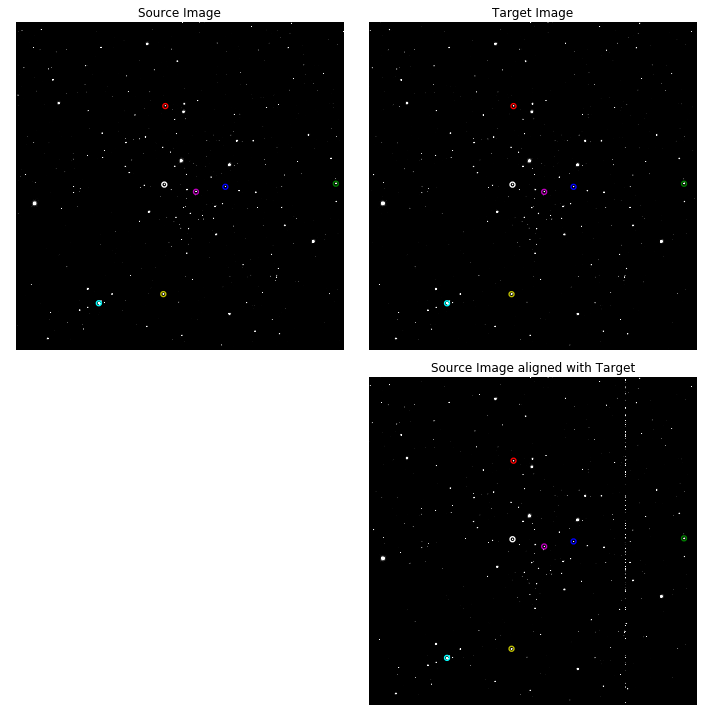

/home/s376r951/RFSLAB/USER_DPT/s376r951/Data/Reduced_Complete/s082_trbf.fits
Rotation: 0.01 degrees

Scale factor: 1.00

Translation: (x, y) = (-58.63, -0.64)


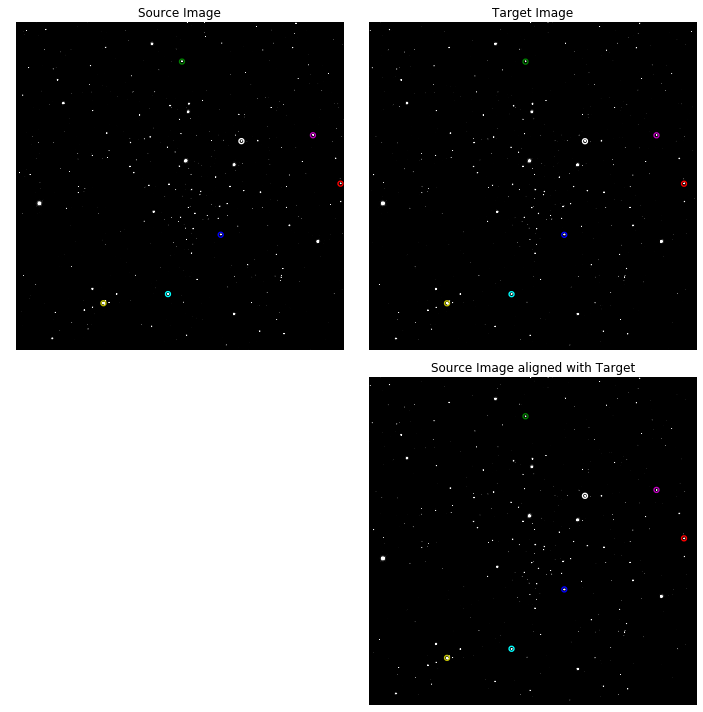

/home/s376r951/RFSLAB/USER_DPT/s376r951/Data/Reduced_Complete/s083_trbf.fits
Rotation: 0.01 degrees

Scale factor: 1.00

Translation: (x, y) = (-87.52, -0.80)


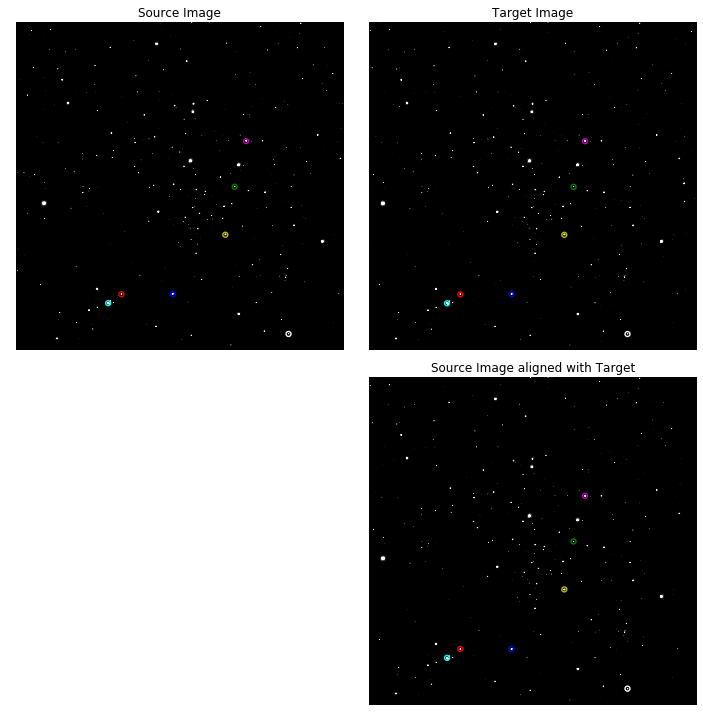

/home/s376r951/RFSLAB/USER_DPT/s376r951/Data/Reduced_Complete/s084_trbf.fits
Rotation: 0.02 degrees

Scale factor: 1.00

Translation: (x, y) = (-116.52, -1.09)


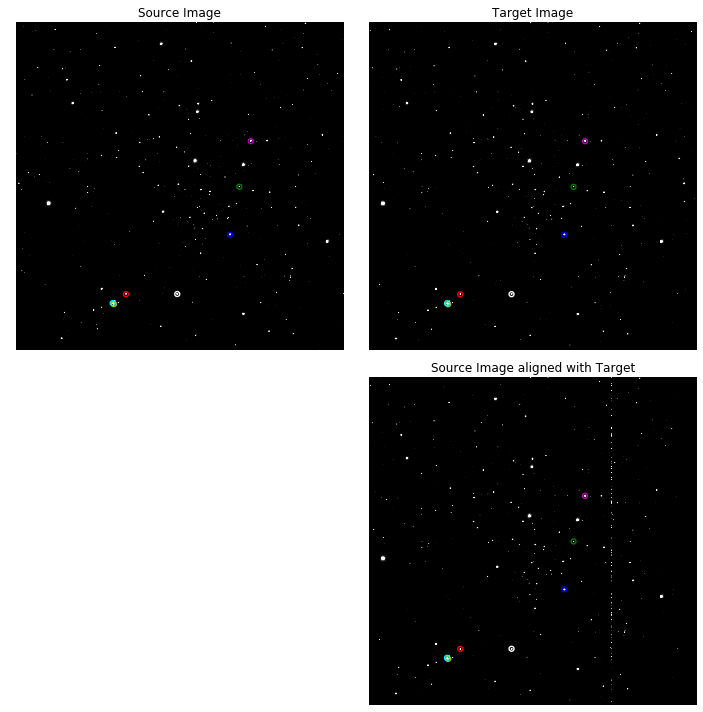

/home/s376r951/RFSLAB/USER_DPT/s376r951/Data/Reduced_Complete/s085_trbf.fits
Rotation: 0.02 degrees

Scale factor: 1.00

Translation: (x, y) = (-142.81, -1.20)


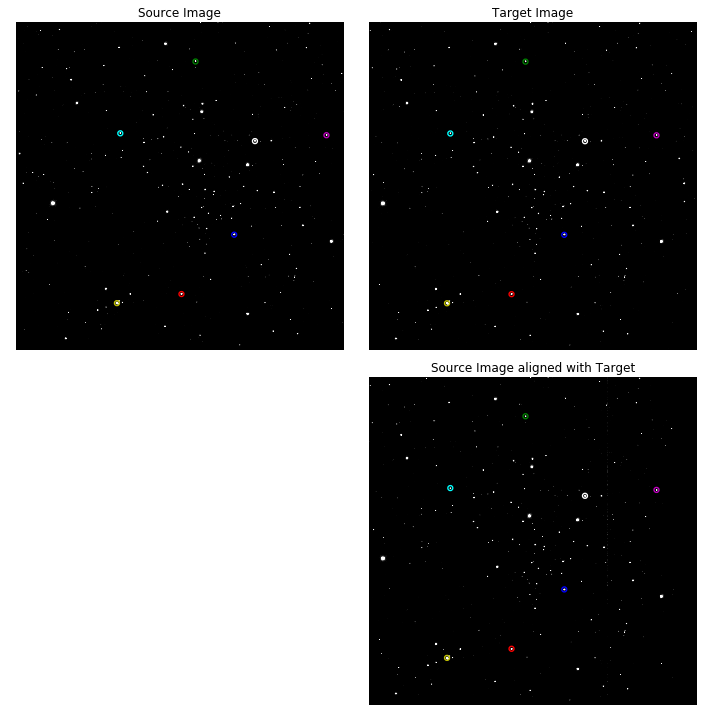

/home/s376r951/RFSLAB/USER_DPT/s376r951/Data/Reduced_Complete/s086_trbf.fits
Rotation: 0.02 degrees

Scale factor: 1.00

Translation: (x, y) = (-171.55, -1.40)


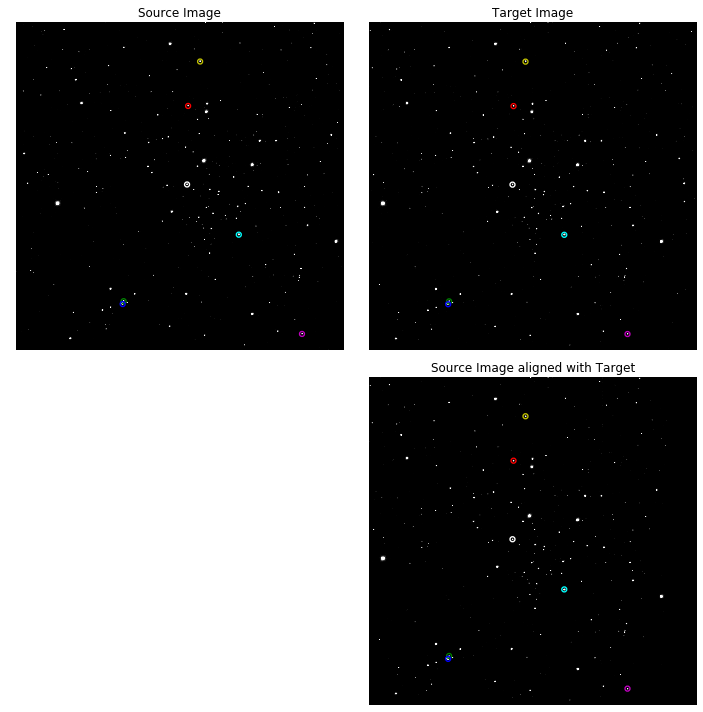

/home/s376r951/RFSLAB/USER_DPT/s376r951/Data/Reduced_Complete/s087_trbf.fits
Rotation: 0.03 degrees

Scale factor: 1.00

Translation: (x, y) = (-198.13, -1.67)


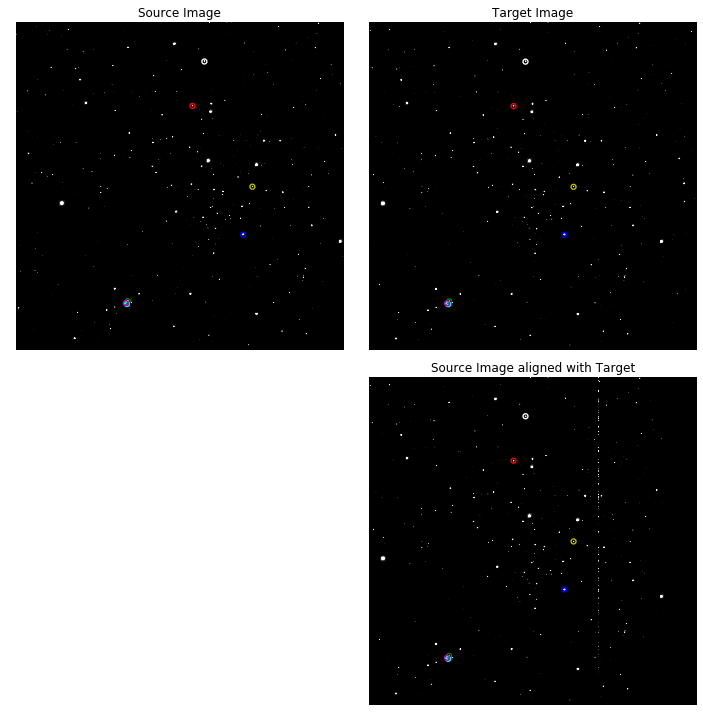

/home/s376r951/RFSLAB/USER_DPT/s376r951/Data/Reduced_Complete/s099_trbf.fits
Rotation: 0.00 degrees

Scale factor: 1.00

Translation: (x, y) = (-78.93, -8.80)


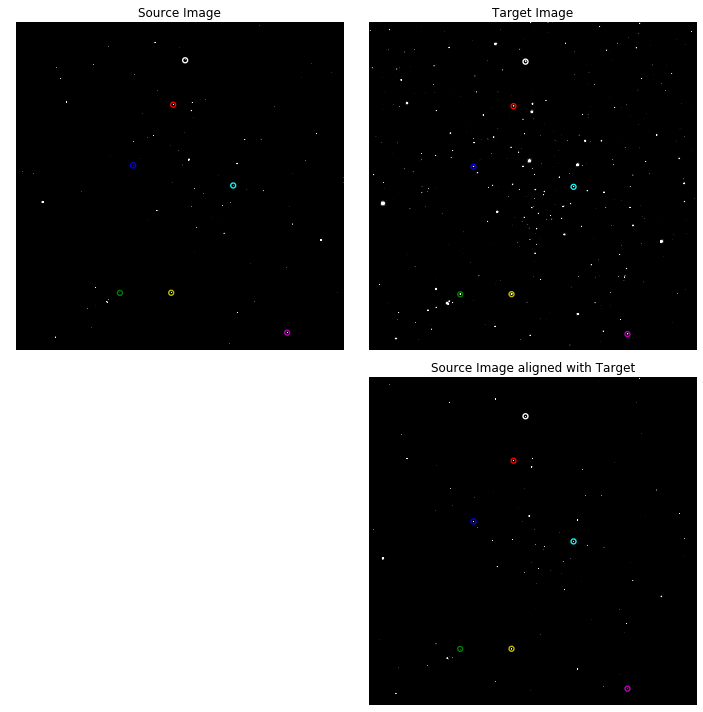

/home/s376r951/RFSLAB/USER_DPT/s376r951/Data/Reduced_Complete/s100_trbf.fits
Rotation: -0.00 degrees

Scale factor: 1.00

Translation: (x, y) = (-52.49, -8.53)


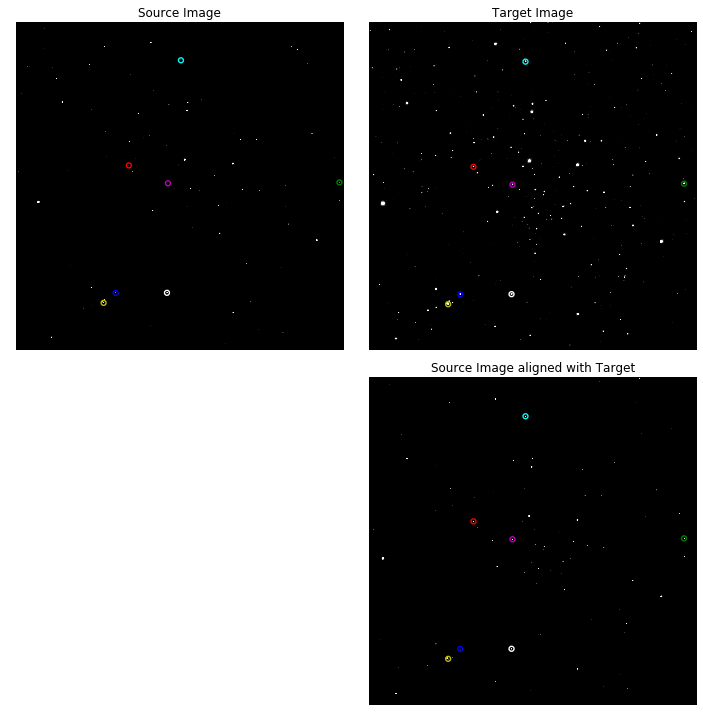

/home/s376r951/RFSLAB/USER_DPT/s376r951/Data/Reduced_Complete/s101_trbf.fits
Rotation: -0.00 degrees

Scale factor: 1.00

Translation: (x, y) = (-27.50, -9.64)


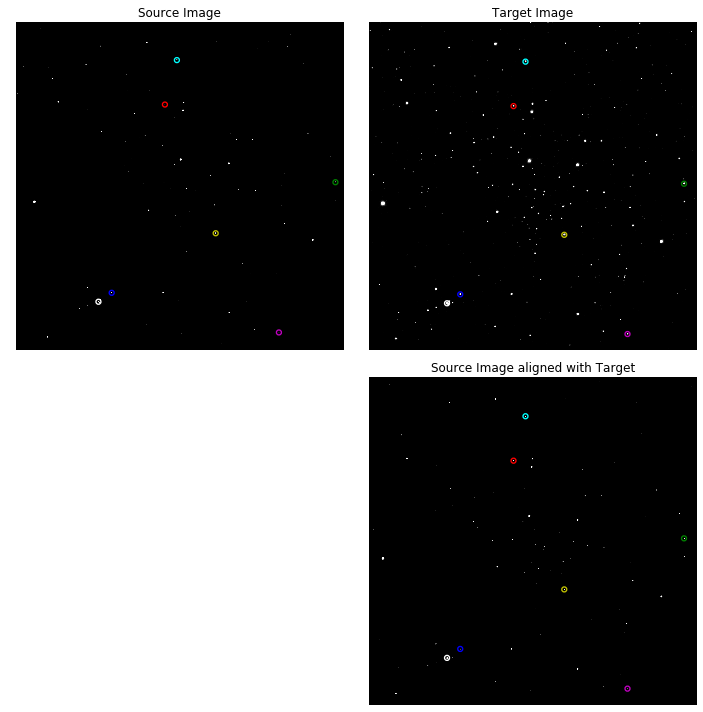

/home/s376r951/RFSLAB/USER_DPT/s376r951/Data/Reduced_Complete/s089_trbf.fits
Rotation: -0.00 degrees

Scale factor: 1.00

Translation: (x, y) = (26.14, -0.34)


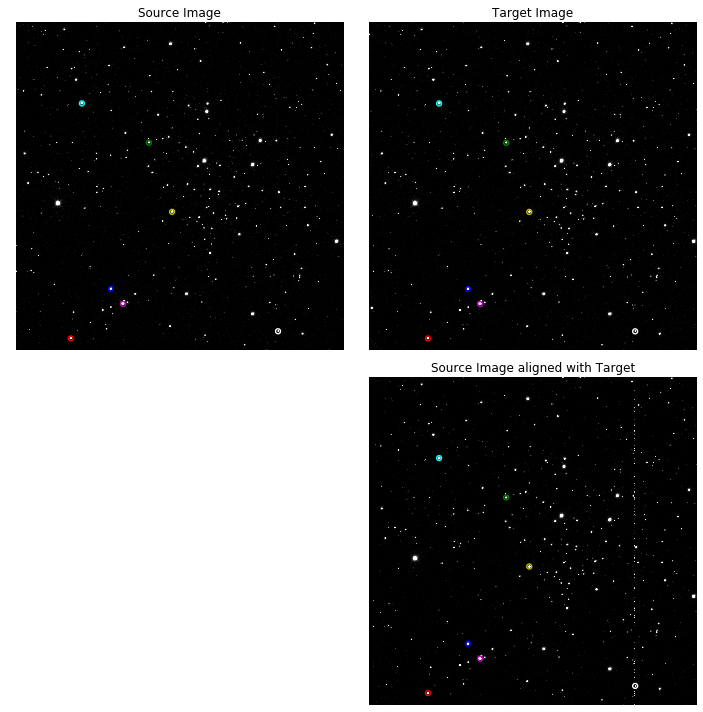

/home/s376r951/RFSLAB/USER_DPT/s376r951/Data/Reduced_Complete/s090_trbf.fits
Rotation: -0.01 degrees

Scale factor: 1.00

Translation: (x, y) = (54.09, -1.19)


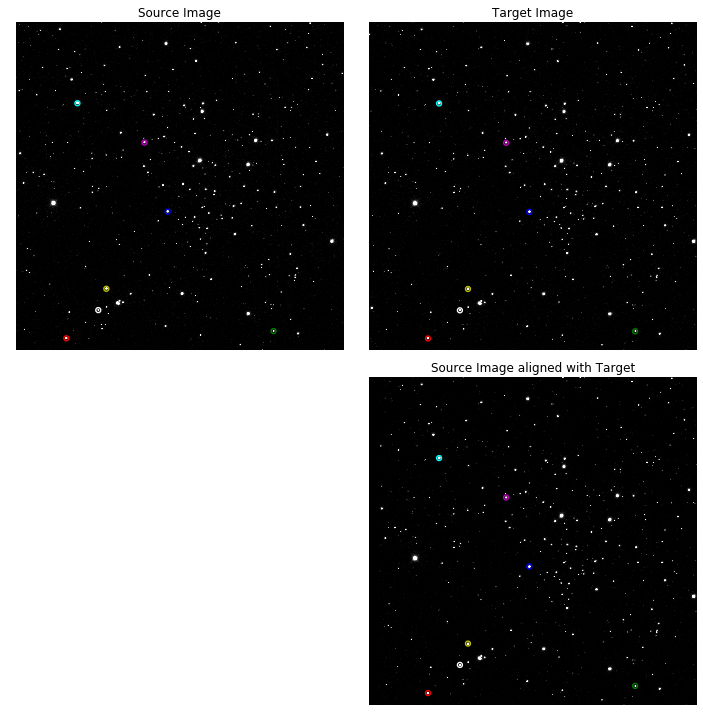

/home/s376r951/RFSLAB/USER_DPT/s376r951/Data/Reduced_Complete/s091_trbf.fits
Rotation: -0.01 degrees

Scale factor: 1.00

Translation: (x, y) = (78.43, -1.94)


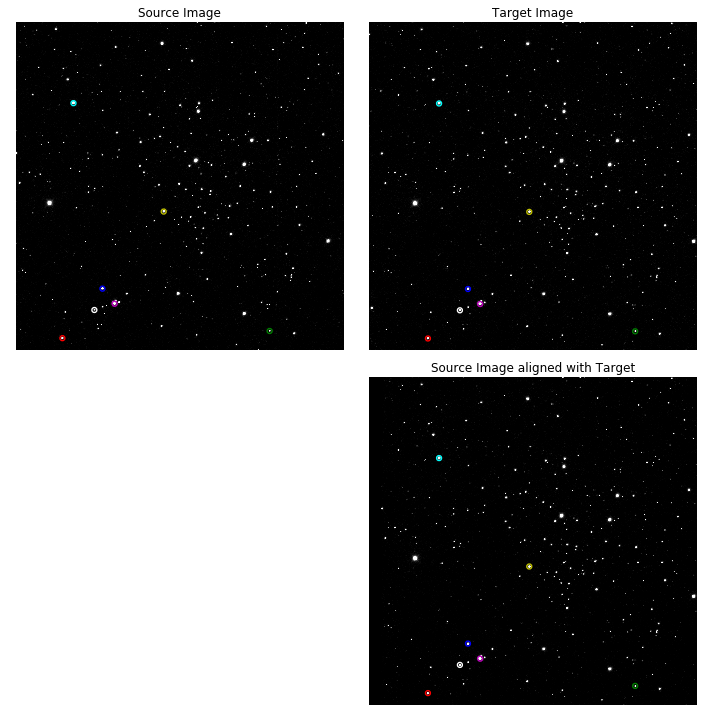

/home/s376r951/RFSLAB/USER_DPT/s376r951/Data/Reduced_Complete/s092_trbf.fits
Rotation: -0.02 degrees

Scale factor: 1.00

Translation: (x, y) = (103.03, -2.50)


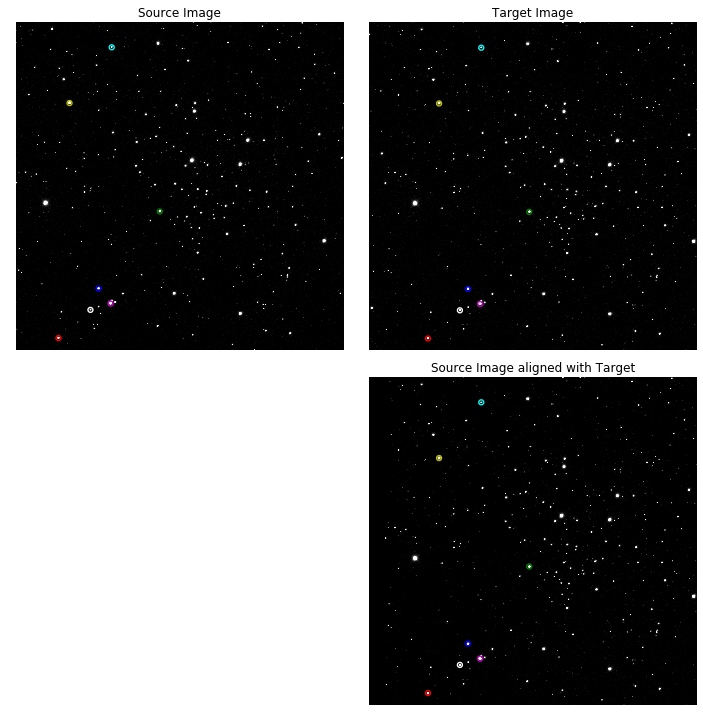

/home/s376r951/RFSLAB/USER_DPT/s376r951/Data/Reduced_Complete/s093_trbf.fits
Rotation: -0.02 degrees

Scale factor: 1.00

Translation: (x, y) = (128.34, -3.13)


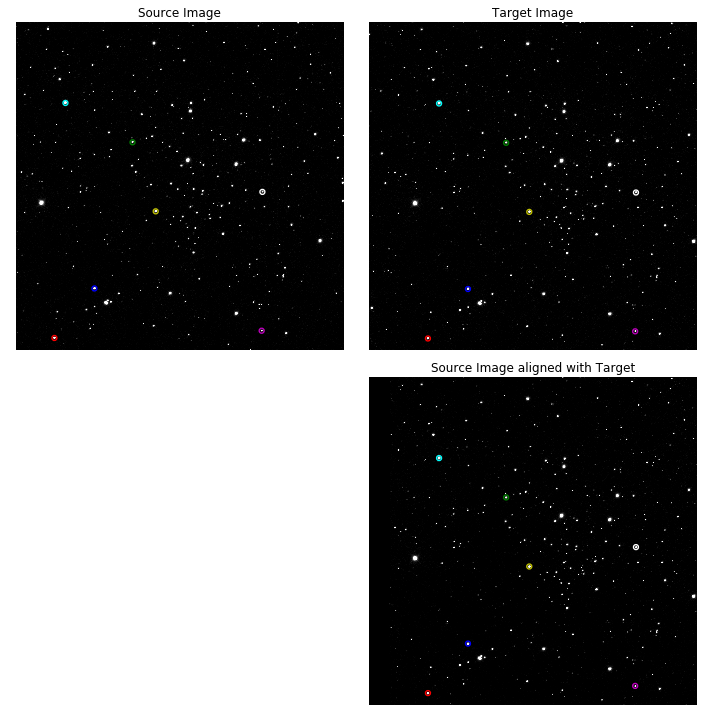

/home/s376r951/RFSLAB/USER_DPT/s376r951/Data/Reduced_Complete/s094_trbf.fits
Rotation: -0.03 degrees

Scale factor: 1.00

Translation: (x, y) = (154.38, -3.89)


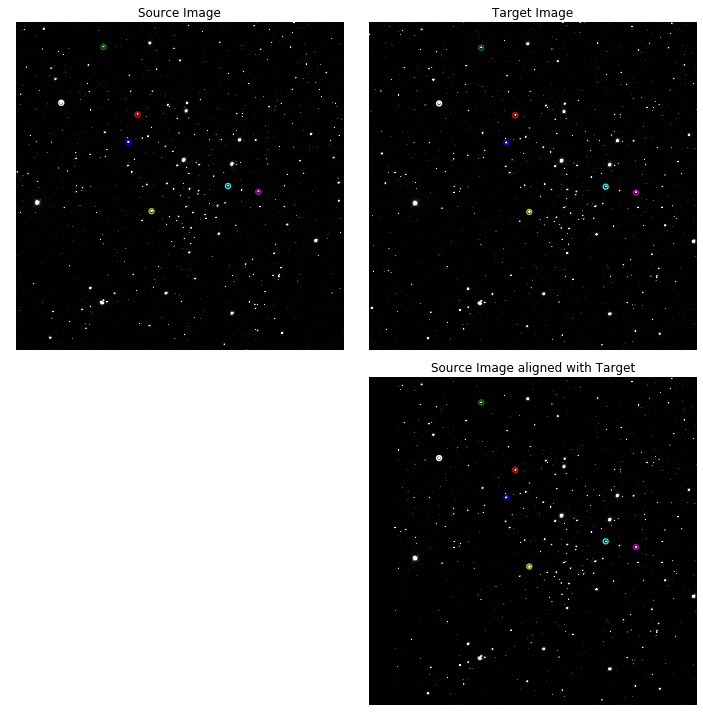

/home/s376r951/RFSLAB/USER_DPT/s376r951/Data/Reduced_Complete/s095_trbf.fits
Rotation: -0.03 degrees

Scale factor: 1.00

Translation: (x, y) = (180.66, -4.65)


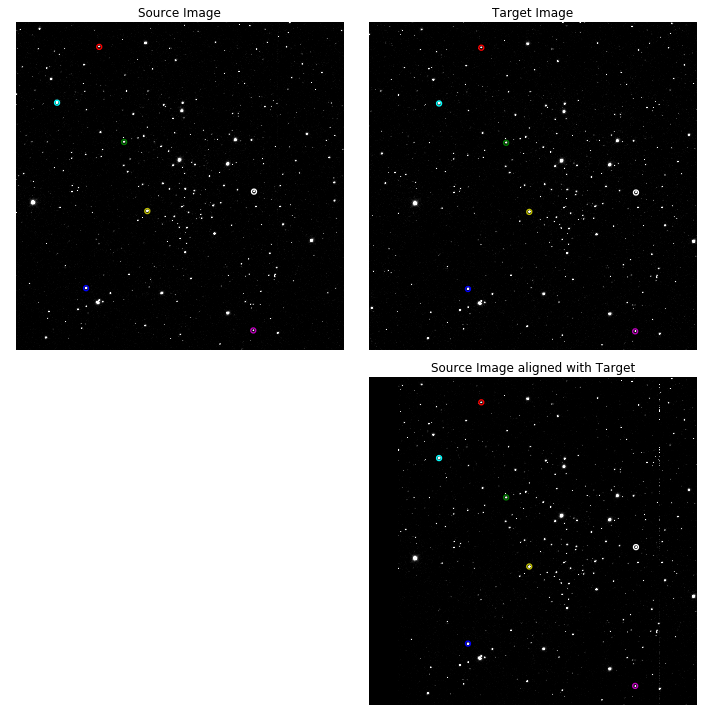

/home/s376r951/RFSLAB/USER_DPT/s376r951/Data/Reduced_Complete/s096_trbf.fits
Rotation: -0.04 degrees

Scale factor: 1.00

Translation: (x, y) = (178.04, -5.64)


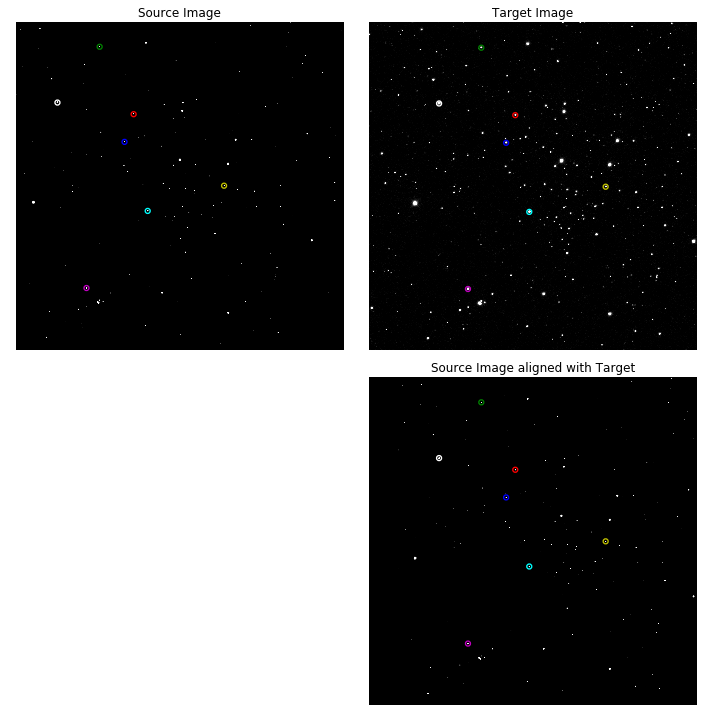

/home/s376r951/RFSLAB/USER_DPT/s376r951/Data/Reduced_Complete/s097_trbf.fits
Rotation: -0.03 degrees

Scale factor: 1.00

Translation: (x, y) = (148.47, -5.93)


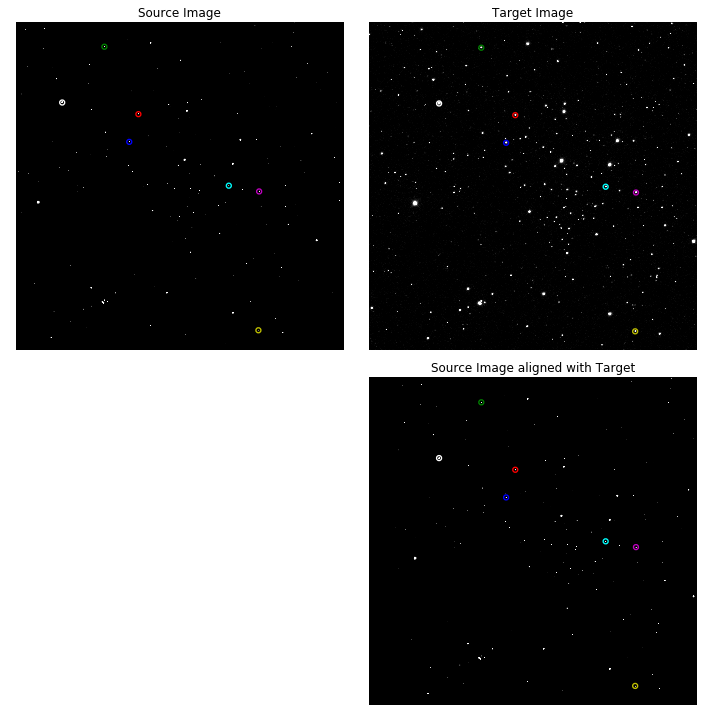

/home/s376r951/RFSLAB/USER_DPT/s376r951/Data/Reduced_Complete/s098_trbf.fits
Rotation: -0.03 degrees

Scale factor: 1.00

Translation: (x, y) = (122.24, -6.26)


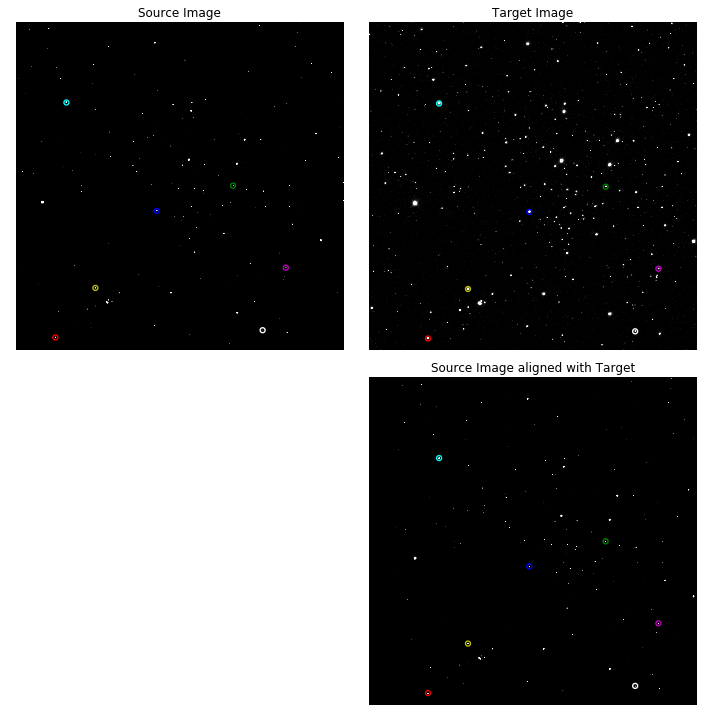

In [9]:
#KING 20 B-Band
im_trans("s081_trbf.fits","s080_trbf.fits","s081_trbfa.fits")
im_trans("s082_trbf.fits","s080_trbf.fits","s082_trbfa.fits")
im_trans("s083_trbf.fits","s080_trbf.fits","s083_trbfa.fits")
im_trans("s084_trbf.fits","s080_trbf.fits","s084_trbfa.fits")
im_trans("s085_trbf.fits","s080_trbf.fits","s085_trbfa.fits")
im_trans("s086_trbf.fits","s080_trbf.fits","s086_trbfa.fits")
im_trans("s087_trbf.fits","s080_trbf.fits","s087_trbfa.fits")
im_trans("s099_trbf.fits","s080_trbf.fits","s099_trbfa.fits")
im_trans("s100_trbf.fits","s080_trbf.fits","s100_trbfa.fits")
im_trans("s101_trbf.fits","s080_trbf.fits","s101_trbfa.fits")

#KING 20 V-Band
im_trans("s089_trbf.fits","s088_trbf.fits","s089_trbfa.fits")
im_trans("s090_trbf.fits","s088_trbf.fits","s090_trbfa.fits")
im_trans("s091_trbf.fits","s088_trbf.fits","s091_trbfa.fits")
im_trans("s092_trbf.fits","s088_trbf.fits","s092_trbfa.fits")
im_trans("s093_trbf.fits","s088_trbf.fits","s093_trbfa.fits")
im_trans("s094_trbf.fits","s088_trbf.fits","s094_trbfa.fits")
im_trans("s095_trbf.fits","s088_trbf.fits","s095_trbfa.fits")
im_trans("s096_trbf.fits","s088_trbf.fits","s096_trbfa.fits")
im_trans("s097_trbf.fits","s088_trbf.fits","s097_trbfa.fits")
im_trans("s098_trbf.fits","s088_trbf.fits","s098_trbfa.fits")

Now open the transformed images in ds9 in different and confirm that they are aligned by blinking the frames.